In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import matplotlib.colors as colors

import sys
sys.path.append('../')

from algorithms import *
from load_data import *
from metrics import *

In [44]:
x = load_matrix(1234)
W = observed_entries(x, squared = True, percentage = 0.5)

In [45]:
x.shape

(560, 560)

In [46]:
baseline = 0.87

In [47]:
u, s, v = np.linalg.svd(x, full_matrices = False)

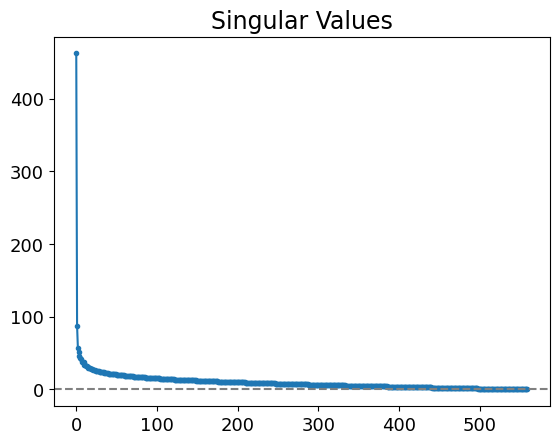

In [40]:
plt.tick_params(axis='both', which='major', labelsize=13)
plt.plot(s[:], marker = '.')
plt.title('Singular Values', fontsize = 17)
plt.axhline(y = 0, color = 'gray', linestyle = '--')
plt.show()

In [41]:
error = []
pred = 0

for r in range(len(s)):
    pred += s[r]*np.outer(u[:, r], v[r, :])
    
    error.append(r2(W, x, pred))

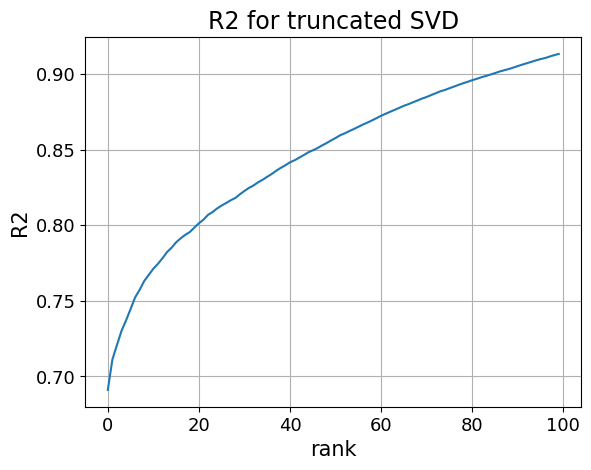

In [42]:
plt.tick_params(axis='both', which='major', labelsize=13)
plt.plot(error[:100])
plt.grid()
plt.title('R2 for truncated SVD', fontsize = 17)
plt.xlabel('rank', fontsize = 15)
plt.ylabel('R2', fontsize = 15)
plt.show()

# First SVD approximation

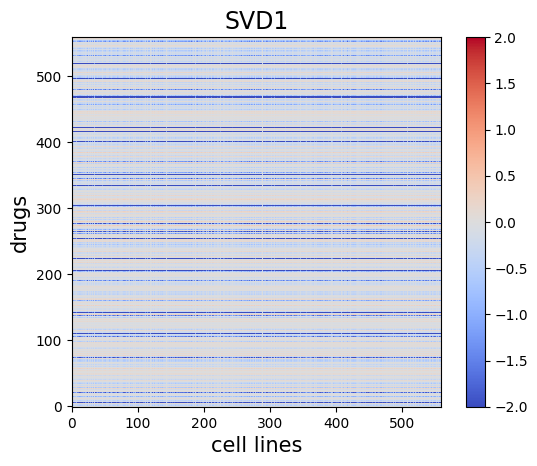

In [52]:
#plt.tick_params(axis='both', which='major', labelsize=13)
svd1 = s[0]*np.outer(u[:, 0], v[0, :])
plt.imshow(svd1, cmap='hot', interpolation='none', origin = 'lower')
plt.imshow(svd1, cmap='coolwarm', interpolation='none',  norm=colors.CenteredNorm(halfrange=2.0), origin = 'lower')
plt.colorbar()
plt.title('SVD1', fontsize = 17)
plt.xlabel('cell lines', fontsize = 15)
plt.ylabel('drugs', fontsize = 15)
plt.show()

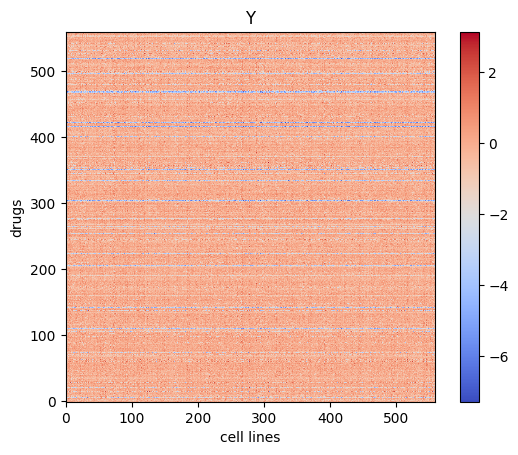

In [57]:
plt.imshow(x, cmap='coolwarm', interpolation='none',  norm=colors.CenteredNorm(halfrange=2.0), origin = 'lower')
plt.colorbar()
plt.title('Y')
plt.xlabel('cell lines')
plt.ylabel('drugs')
plt.show()

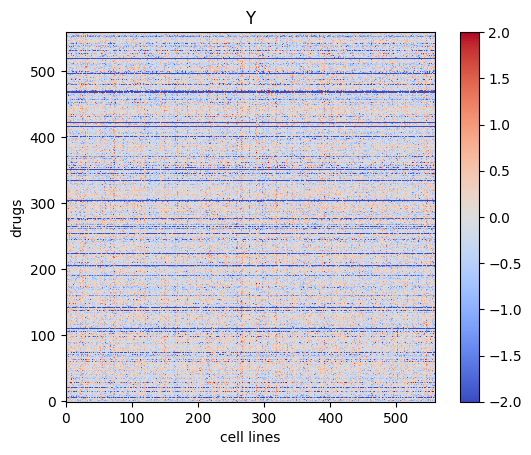

In [11]:
#plt.imshow(svd1, cmap='hot', interpolation='none', origin = 'lower')
plt.imshow(x, cmap='coolwarm', interpolation='none',  norm=colors.CenteredNorm(halfrange=2.0), origin = 'lower')
plt.colorbar()
plt.title('Y')
plt.xlabel('cell lines')
plt.ylabel('drugs')
plt.show()

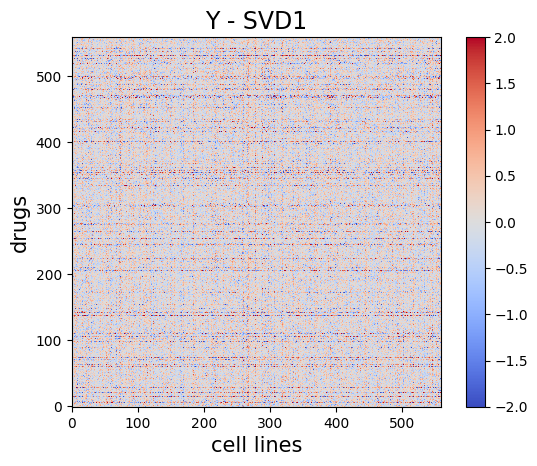

In [53]:
#plt.imshow(svd1, cmap='hot', interpolation='none', origin = 'lower')
plt.imshow(x - svd1, cmap='coolwarm', interpolation='none',  norm=colors.CenteredNorm(halfrange=2.0), origin = 'lower')
plt.colorbar()
plt.title('Y - SVD1', fontsize = 17)
plt.xlabel('cell lines', fontsize = 15)
plt.ylabel('drugs', fontsize = 15)
plt.show()

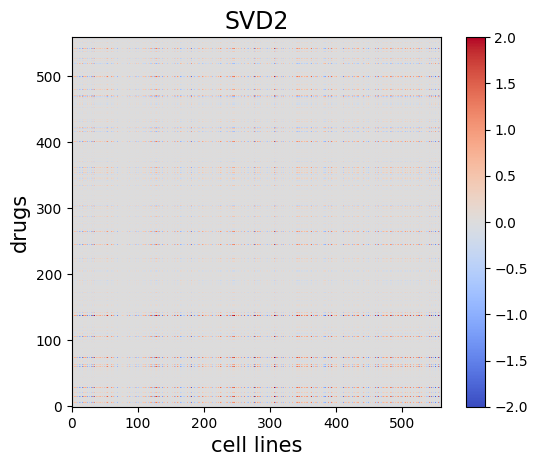

In [54]:
svd2 = s[1]*np.outer(u[:, 1], v[1, :])
plt.imshow(svd2, cmap='coolwarm', interpolation='none',  norm=colors.CenteredNorm(halfrange=2.0), origin = 'lower')
plt.colorbar()
plt.title('SVD2', fontsize = 17)
plt.xlabel('cell lines', fontsize = 15)
plt.ylabel('drugs', fontsize = 15)
plt.show()

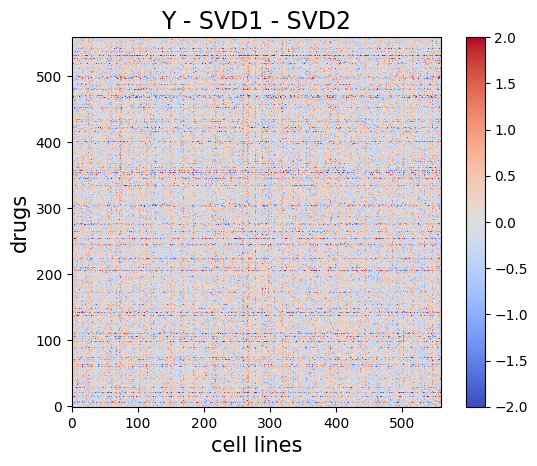

In [55]:
#plt.imshow(svd1, cmap='hot', interpolation='none', origin = 'lower')
plt.imshow(x - svd1 - svd2, cmap='coolwarm', interpolation='none',  norm=colors.CenteredNorm(halfrange=2.0), origin = 'lower')
plt.colorbar()
plt.title('Y - SVD1 - SVD2', fontsize = 17)
plt.xlabel('cell lines', fontsize = 15)
plt.ylabel('drugs', fontsize = 15)
plt.show()

# Same for killer data

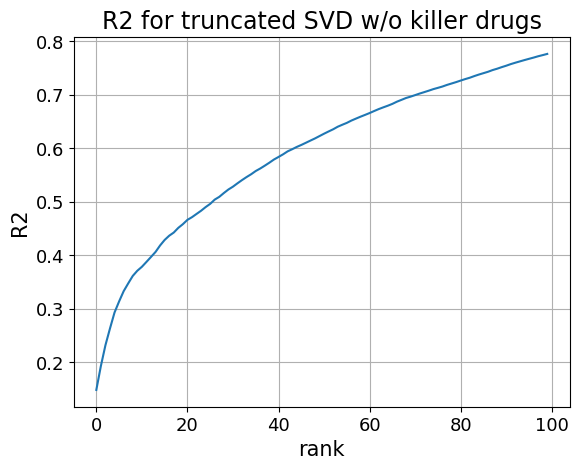

In [43]:
x = load_matrix(1234, 0.8)
W = observed_entries(x, squared = True, percentage = 0.5)

u, s, v = np.linalg.svd(x, full_matrices = False)

error = []
pred = 0

for r in range(len(s)):
    pred += s[r]*np.outer(u[:, r], v[r, :])
    
    error.append(r2(W, x, pred))

plt.tick_params(axis='both', which='major', labelsize=13)
plt.plot(error[:100])
plt.grid()
plt.title('R2 for truncated SVD w/o killer drugs', fontsize = 17)
plt.xlabel('rank', fontsize = 15)
plt.ylabel('R2', fontsize = 15)
plt.show()

# killer drugs

In [3]:
y = load_matrix(1234, 0.8)
W = observed_entries(y, squared = True, percentage = 0.5)

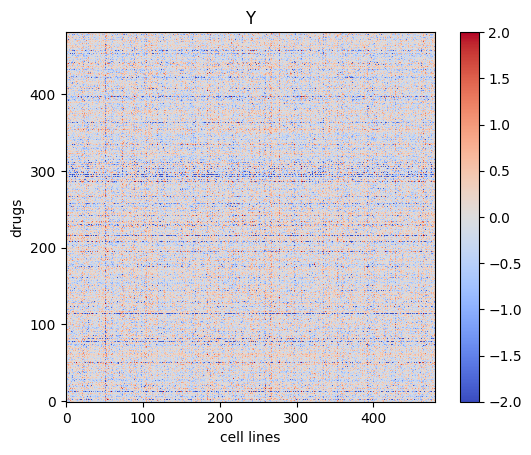

In [5]:
plt.imshow(y, cmap='coolwarm', interpolation='none',  norm=colors.CenteredNorm(halfrange=2.0), origin = 'lower')
plt.colorbar()
plt.title('Y')
plt.xlabel('cell lines')
plt.ylabel('drugs')
plt.show()

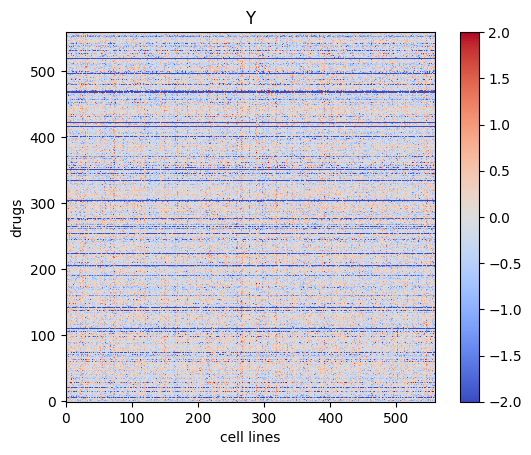

In [6]:
plt.imshow(load_matrix(1234, 1), cmap='coolwarm', interpolation='none',  norm=colors.CenteredNorm(halfrange=2.0), origin = 'lower')
plt.colorbar()
plt.title('Y')
plt.xlabel('cell lines')
plt.ylabel('drugs')
plt.show()